In [1]:
import pandas as pd
cell_data=pd.read_csv('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/rna_metadata/2.16.metadata.csv', na_values='NAN',infer_datetime_format=True,index_col="idbarcode")
cell_data['celltype'] = cell_data['celltype'].astype(str)
cell_data
print(cell_data["celltype"].value_counts())

CD8+ Tem                 96098
CD4+ Tcm                 44395
Naïve CD4+ T cells       33275
NK/NKT                   30529
Naïve B                  20867
CD14+ Mono               12603
Naïve CD8+ T cells       10343
 Intermediate B           6989
Treg                      4598
Plasmablasts/Memory B     3388
MAIT                      3357
CD16+ Mono                2950
Plasmacytoid DC            706
Name: celltype, dtype: int64


In [2]:
import os
import pycisTopic
%matplotlib inline

work_dir = '/database/huangdingli/0712_ATAC+RNA/'
fragments_dict = {'M1-1': os.path.join(work_dir, 'M1-1/outs/atac_fragments.tsv.gz'),
                  'M1-2': os.path.join(work_dir, 'M1-2/outs/atac_fragments.tsv.gz'),
                  'M1-3': os.path.join(work_dir, 'M1-3/outs/atac_fragments.tsv.gz'),
                  'M1-4': os.path.join(work_dir, 'M1-4/outs/atac_fragments.tsv.gz'),
                  'M1-5': os.path.join(work_dir, 'M1-5/outs/atac_fragments.tsv.gz'),
                  'M1-6': os.path.join(work_dir, 'M1-6/outs/atac_fragments.tsv.gz'),
                  'M1-7': os.path.join(work_dir, 'M1-7/outs/atac_fragments.tsv.gz'),
                  'M1-8': os.path.join(work_dir, 'M1-8/outs/atac_fragments.tsv.gz'),
                  'M1-9': os.path.join(work_dir, 'M1-9/outs/atac_fragments.tsv.gz'),
                  'M1-10': os.path.join(work_dir, 'M1-10/outs/atac_fragments.tsv.gz'),
                  'M2-1': os.path.join(work_dir, 'M2-1/outs/atac_fragments.tsv.gz'),
                  'M2-4': os.path.join(work_dir, 'M2-4/outs/atac_fragments.tsv.gz'),
                  'M2-5': os.path.join(work_dir, 'M2-5/outs/atac_fragments.tsv.gz'),
                  'M2-6': os.path.join(work_dir, 'M2-6/outs/atac_fragments.tsv.gz'),
                  'M2-7': os.path.join(work_dir, 'M2-7/outs/atac_fragments.tsv.gz'),
                  'M2-8': os.path.join(work_dir, 'M2-8/outs/atac_fragments.tsv.gz'),
                  'M2-9': os.path.join(work_dir, 'M2-9/outs/atac_fragments.tsv.gz'),
                  'M2-10': os.path.join(work_dir, 'M2-10/outs/atac_fragments.tsv.gz'),
                  'M3-1': os.path.join(work_dir, 'M3-1/outs/atac_fragments.tsv.gz'),
                  'M3-2': os.path.join(work_dir, 'M3-2/outs/atac_fragments.tsv.gz'),
                  'M3-3': os.path.join(work_dir, 'M3-3/outs/atac_fragments.tsv.gz'),
                  'M3-4': os.path.join(work_dir, 'M3-4/outs/atac_fragments.tsv.gz'),
                  'M3-5': os.path.join(work_dir, 'M3-5/outs/atac_fragments.tsv.gz'),
                  'M3-6': os.path.join(work_dir, 'M3-6/outs/atac_fragments.tsv.gz'),
                  'M3-7': os.path.join(work_dir, 'M3-7/outs/atac_fragments.tsv.gz'),
                  'M3-8': os.path.join(work_dir, 'M3-8/outs/atac_fragments.tsv.gz'),
                  'M3-9': os.path.join(work_dir, 'M3-9/outs/atac_fragments.tsv.gz'),
                  'M3-10': os.path.join(work_dir, 'M3-10/outs/atac_fragments.tsv.gz'),
                  'M5-1': os.path.join(work_dir, 'M5-1/outs/atac_fragments.tsv.gz'),
                  'M5-2': os.path.join(work_dir, 'M5-2/outs/atac_fragments.tsv.gz'),
                  'M5-3': os.path.join(work_dir, 'M5-3/outs/atac_fragments.tsv.gz'),
                  'M5-4': os.path.join(work_dir, 'M5-4/outs/atac_fragments.tsv.gz'),
                  'M5-5': os.path.join(work_dir, 'M5-5/outs/atac_fragments.tsv.gz'),
                  'M5-6': os.path.join(work_dir, 'M5-6/outs/atac_fragments.tsv.gz'),
                  'M5-7': os.path.join(work_dir, 'M5-7/outs/atac_fragments.tsv.gz'),
                  'M5-8': os.path.join(work_dir, 'M5-8/outs/atac_fragments.tsv.gz'),
                  'M5-9': os.path.join(work_dir, 'M5-9/outs/atac_fragments.tsv.gz'),
                  'M5-10': os.path.join(work_dir, 'M5-10/outs/atac_fragments.tsv.gz')}


import pyranges as pr
import requests
import pandas as pd

target_url='http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes'
chromsizes=pd.read_csv(target_url, sep='\t', header=None)
chromsizes.columns=['Chromosome', 'End']
chromsizes['Start']=[0]*chromsizes.shape[0]
chromsizes=chromsizes.loc[:,['Chromosome', 'Start', 'End']]
# Exceptionally in this case, to agree with CellRangerARC annotations
chromsizes['Chromosome'] = [chromsizes['Chromosome'][x].replace('v', '.') for x in range(len(chromsizes['Chromosome']))]
chromsizes['Chromosome'] = [chromsizes['Chromosome'][x].split('_')[1] if len(chromsizes['Chromosome'][x].split('_')) > 1 else chromsizes['Chromosome'][x] for x in range(len(chromsizes['Chromosome']))]
chromsizes=pr.PyRanges(chromsizes)


In [31]:
import ray
ray.shutdown()
ray.init(_temp_dir = '/DATA1/wangrong/temp/ray_spill/')

from pycisTopic.pseudobulk_peak_calling import export_pseudobulk
bw_paths, bed_paths = export_pseudobulk(input_data = cell_data,
                 variable = 'celltype',
                 sample_id_col = 'sample_id',             
                 chromsizes = chromsizes,
                 bed_path = '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/38_pseudobulk_bed_files/',
                 bigwig_path = '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/38_pseudobulk_bw_files/',
                 path_to_fragments = fragments_dict,
                 n_cpu = 64,  
                 normalize_bigwig = True,
                 remove_duplicates = True,
                 _temp_dir = '/DATA1/wangrong/temp/ray_spill/',
                 split_pattern = '___',
                 ignore_reinit_error = True)           

2023-02-16 10:55:56,232	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


2023-02-16 10:55:58,843 cisTopic     INFO     Reading fragments from /database/huangdingli/0712_ATAC+RNA/M1-1/outs/atac_fragments.tsv.gz
2023-02-16 10:57:57,138 cisTopic     INFO     Reading fragments from /database/huangdingli/0712_ATAC+RNA/M1-2/outs/atac_fragments.tsv.gz
2023-02-16 10:59:33,430 cisTopic     INFO     Reading fragments from /database/huangdingli/0712_ATAC+RNA/M1-3/outs/atac_fragments.tsv.gz
2023-02-16 11:00:53,939 cisTopic     INFO     Reading fragments from /database/huangdingli/0712_ATAC+RNA/M1-4/outs/atac_fragments.tsv.gz
2023-02-16 11:02:23,972 cisTopic     INFO     Reading fragments from /database/huangdingli/0712_ATAC+RNA/M1-5/outs/atac_fragments.tsv.gz
2023-02-16 11:04:20,396 cisTopic     INFO     Reading fragments from /database/huangdingli/0712_ATAC+RNA/M1-6/outs/atac_fragments.tsv.gz
2023-02-16 11:06:16,319 cisTopic     INFO     Reading fragments from /database/huangdingli/0712_ATAC+RNA/M1-7/outs/atac_fragments.tsv.gz
2023-02-16 11:08:24,716 cisTopic     INFO

2023-02-16 12:26:39,969	INFO worker.py:1360 -- Calling ray.init() again after it has already been called.


(export_pseudobulk_ray pid=592640) 2023-02-16 12:27:54,769 cisTopic     INFO     Creating pseudobulk for CD14_Mono


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])
(raylet) Spilled 99425 MiB, 2 objects, write throughput 110 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
(raylet) Spilled 99443 MiB, 4 objects, write throughput 110 MiB/s.


(export_pseudobulk_ray pid=592640) 2023-02-16 13:05:08,176 cisTopic     INFO     CD14_Mono done!
(export_pseudobulk_ray pid=592640) 2023-02-16 13:07:19,591 cisTopic     INFO     Creating pseudobulk for CD16_Mono


(raylet) Spilled 198851 MiB, 5 objects, write throughput 72 MiB/s.
(raylet) Spilled 298277 MiB, 8 objects, write throughput 105 MiB/s.
(raylet) Spilled 298295 MiB, 10 objects, write throughput 105 MiB/s.
(raylet) Spilled 397704 MiB, 11 objects, write throughput 105 MiB/s.
(raylet) Spilled 397721 MiB, 13 objects, write throughput 105 MiB/s.
(raylet) Spilled 497130 MiB, 14 objects, write throughput 111 MiB/s.
(raylet) Spilled 596556 MiB, 17 objects, write throughput 110 MiB/s.
(raylet) Spilled 1093686 MiB, 32 objects, write throughput 102 MiB/s.
(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-16 16:15:19,333 cisTopic     INFO     CD16_Mono done!
(export_pseudobulk_ray pid=592640) 2023-02-16 16:18:08,531 cisTopic     INFO     Creating pseudobulk for CD4_Tcm


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-16 18:26:07,707 cisTopic     INFO     CD4_Tcm done!
(export_pseudobulk_ray pid=592640) 2023-02-16 18:26:19,186 cisTopic     INFO     Creating pseudobulk for CD8_Tem


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-16 21:45:45,845 cisTopic     INFO     CD8_Tem done!
(export_pseudobulk_ray pid=592640) 2023-02-16 21:51:00,544 cisTopic     INFO     Creating pseudobulk for IntermediateB


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-16 22:31:33,236 cisTopic     INFO     IntermediateB done!
(export_pseudobulk_ray pid=592640) 2023-02-16 22:31:36,982 cisTopic     INFO     Creating pseudobulk for MAIT


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-16 22:39:36,556 cisTopic     INFO     MAIT done!
(export_pseudobulk_ray pid=592640) 2023-02-16 23:04:42,070 cisTopic     INFO     Creating pseudobulk for NK_NKT


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-17 00:20:10,566 cisTopic     INFO     NK_NKT done!
(export_pseudobulk_ray pid=592640) 2023-02-17 00:20:16,171 cisTopic     INFO     Creating pseudobulk for Na_veB


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-17 01:09:23,384 cisTopic     INFO     Na_veB done!
(export_pseudobulk_ray pid=592640) 2023-02-17 01:09:32,617 cisTopic     INFO     Creating pseudobulk for Na_veCD4_Tcells


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-17 02:19:03,349 cisTopic     INFO     Na_veCD4_Tcells done!
(export_pseudobulk_ray pid=592640) 2023-02-17 02:19:11,975 cisTopic     INFO     Creating pseudobulk for Na_veCD8_Tcells


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-17 02:40:53,182 cisTopic     INFO     Na_veCD8_Tcells done!
(export_pseudobulk_ray pid=592640) 2023-02-17 02:47:25,336 cisTopic     INFO     Creating pseudobulk for Plasmablasts_MemoryB


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-17 02:55:01,046 cisTopic     INFO     Plasmablasts_MemoryB done!
(export_pseudobulk_ray pid=592640) 2023-02-17 03:00:19,562 cisTopic     INFO     Creating pseudobulk for PlasmacytoidDC


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-17 03:03:11,835 cisTopic     INFO     PlasmacytoidDC done!
(export_pseudobulk_ray pid=592640) 2023-02-17 03:26:56,519 cisTopic     INFO     Creating pseudobulk for Treg


(export_pseudobulk_ray pid=592640) /usr/local/lib/python3.8/dist-packages/pycisTopic/pseudobulk_peak_calling.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(export_pseudobulk_ray pid=592640)   group_fragments = group_fragments_list[0].append(group_fragments_list[1:])


(export_pseudobulk_ray pid=592640) 2023-02-17 03:34:42,332 cisTopic     INFO     Treg done!


In [32]:
import pickle

with open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/38_pseudobulk_bed_files/bed_paths.pkl', 'wb') as f:
  pickle.dump(bed_paths, f)
with open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/38_pseudobulk_bed_files/bw_paths.pkl', 'wb') as f:
  pickle.dump(bw_paths, f)


In [35]:
bed_paths = pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/38_pseudobulk_bed_files/bed_paths.pkl', 'rb'))
bw_paths =  pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/38_pseudobulk_bed_files/bw_paths.pkl', 'rb'))

from pycisTopic.pseudobulk_peak_calling import peak_calling
macs_path = 'macs2'
# Run peak calling
narrow_peaks_dict = peak_calling(macs_path,
                                 bed_paths,
                                 os.path.join('/database/huhuajie/Results/scATAC/consensus_peak_calling/MACS/'),
                                 genome_size='hs',
                                 n_cpu=64,
                                 input_format='BEDPE',
                                 shift=73,
                                 ext_size=146,
                                 keep_dup = 'all',
                                 q_value = 0.05,
                                 _temp_dir = '/DATA1/wangrong/temp/ray_spill/',
                                 ignore_reinit_error = True)

with open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/MACS/narrow_peaks_dict.pkl', 'wb') as f:
  pickle.dump(narrow_peaks_dict, f)



2023-02-17 11:37:03,118	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


(macs_call_peak_ray pid=740224) 2023-02-17 11:37:05,393 cisTopic     INFO     Calling peaks for Na_veB with macs2 callpeak --treatment /database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/38_pseudobulk_bed_files/Na_veB.bed.gz --name Na_veB  --outdir /database/huhuajie/Results/scATAC/consensus_peak_calling/MACS/ --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=740252) 2023-02-17 11:37:05,415 cisTopic     INFO     Calling peaks for CD16_Mono with macs2 callpeak --treatment /database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/38_pseudobulk_bed_files/CD16_Mono.bed.gz --name CD16_Mono  --outdir /database/huhuajie/Results/scATAC/consensus_peak_calling/MACS/ --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=740212) 2023-02-17 11:37:05,478 cisTopic     INFO     Calling peaks for P

In [11]:
import pickle
narrow_peaks_dict =  pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/MACS/narrow_peaks_dict.pkl', 'rb'))

from pycisTopic.iterative_peak_calling import *
# Other param
peak_half_width = 250
path_to_blacklist = '/jupyter/huhuajie/Data/blacklist/hg38-blacklist.v2.bed'
# Get consensus peaks
consensus_peaks = get_consensus_peaks(narrow_peaks_dict, peak_half_width, chromsizes=chromsizes, path_to_blacklist=path_to_blacklist)

# Write to bed
consensus_peaks.to_bed(
    path = '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
    keep=True,
    compression='infer',
    chain=False)

import pybiomart as pbm

dataset = pbm.Dataset(name='hsapiens_gene_ensembl',  host='http://www.ensembl.org')
annot = dataset.query(attributes=['chromosome_name', 'transcription_start_site', 'strand', 'external_gene_name', 'transcript_biotype'])
annot['Chromosome/scaffold name'] = annot['Chromosome/scaffold name'].to_numpy(dtype = str)
filter = annot['Chromosome/scaffold name'].str.contains('CHR|GL|JH|MT')
annot = annot[~filter]
annot['Chromosome/scaffold name'] = annot['Chromosome/scaffold name'].str.replace(r'(\b\S)', r'chr\1')
annot.columns=['Chromosome', 'Start', 'Strand', 'Gene', 'Transcript_type']
annot = annot[annot.Transcript_type == 'protein_coding']

#import ray
#ray.shutdown()
#ray.init(_temp_dir = '/database/temp/ray_spill/')

from pycisTopic.qc import *
## Set regions. We will use the consensus peaks we have just called, but we could also use the bulk peaks per sample instead for this step
path_to_regions= {'M1-1': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M1-2': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M1-3': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M1-4': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M1-5': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M1-6': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M1-7': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M1-8': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M1-9': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M1-10': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M2-1': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M2-4': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M2-5': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M2-6': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M2-7': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M2-8': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M2-9': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M2-10': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M3-1': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M3-2': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M3-3': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M3-4': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M3-5': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M3-6': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M3-7': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M3-8': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M3-9': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M3-10': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M5-1': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M5-2': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M5-3': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M5-4': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M5-5': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M5-6': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M5-7': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M5-8': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M5-9': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed',
                  'M5-10': '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/consensus_peak_calling/consensus_regions.bed'}
metadata_bc, profile_data_dict = compute_qc_stats(
                fragments_dict = fragments_dict,
                tss_annotation = annot,
                stats=['barcode_rank_plot', 'duplicate_rate', 'insert_size_distribution', 'profile_tss', 'frip'],
                label_list = None,
                path_to_regions = path_to_regions,
                n_cpu = 4,
                valid_bc = None,
                n_frag = 100,
                n_bc = None,
                tss_flank_window = 1000,
                tss_window = 50,
                tss_minimum_signal_window = 100,
                tss_rolling_window = 10,
                remove_duplicates = True,
                _temp_dir = '/DATA1/wangrong/temp/ray_spill/',
                ignore_reinit_error = True)

if not os.path.exists('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/quality_control'):
    os.makedirs('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/quality_control')

pickle.dump(metadata_bc,
            open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/quality_control/38_metadata_bc.pkl', 'wb'))
pickle.dump(profile_data_dict,
            open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/quality_control/38_profile_data_dict.pkl', 'wb'))

metadata_bc

2023-02-18 11:03:41,672 cisTopic     INFO     Extending and merging peaks per class
2023-02-18 11:08:21,780 cisTopic     INFO     Normalizing peak scores
2023-02-18 11:08:22,683 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2023-02-18 11:10:40,704 cisTopic     INFO     Done!


/usr/local/lib/python3.8/dist-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/usr/local/lib/python3.8/dist-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/usr/local/lib/python3.8/dist-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/usr/local/lib/python3.8/dist-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/usr/local/lib/python3.8/dist-packages/pyranges/out.py:37: FutureWarning: Passin

2023-02-18 11:10:49,289	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(compute_qc_stats_ray pid=25760) 2023-02-18 11:10:51,275 cisTopic     INFO     Reading M1-3
(compute_qc_stats_ray pid=25759) 2023-02-18 11:10:51,288 cisTopic     INFO     Reading M1-2
(compute_qc_stats_ray pid=25762) 2023-02-18 11:10:51,283 cisTopic     INFO     Reading M1-1
(compute_qc_stats_ray pid=25761) 2023-02-18 11:10:51,391 cisTopic     INFO     Reading M1-4
(compute_qc_stats_ray pid=25760) 2023-02-18 11:12:21,741 cisTopic     INFO     Computing barcode rank plot for M1-3
(compute_qc_stats_ray pid=25760) 2023-02-18 11:12:21,741 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25762) 2023-02-18 11:12:22,656 cisTopic     INFO     Computing barcode rank plot for M1-1
(compute_qc_stats_ray pid=25762) 2023-02-18 11:12:22,656 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25759) 2023-02-18 11:12:25,562 cisTopic     INFO     Computing barcode rank plot for M1-2
(compute_qc_stats_ray pid=25759) 2023-02-18 11:12:25,562 cisTopic     INFO     Counting 

(compute_qc_stats_ray pid=25759) 2023-02-18 11:15:58,360 cisTopic     INFO     Coverage matrix done
(compute_qc_stats_ray pid=25761) 2023-02-18 11:16:05,039 cisTopic     INFO     Returning normalized TSS coverage matrix per barcode
(compute_qc_stats_ray pid=25759) 2023-02-18 11:16:20,518 cisTopic     INFO     Returning normalized TSS coverage matrix per barcode
(compute_qc_stats_ray pid=25762) 2023-02-18 11:16:21,529 cisTopic     INFO     Sample M1-1 done!
(compute_qc_stats_ray pid=25762) 2023-02-18 11:16:22,408 cisTopic     INFO     Reading M1-5
(compute_qc_stats_ray pid=25760) 2023-02-18 11:16:22,844 cisTopic     INFO     Sample M1-3 done!
(compute_qc_stats_ray pid=25760) 2023-02-18 11:16:23,883 cisTopic     INFO     Reading M1-6
(compute_qc_stats_ray pid=25761) 2023-02-18 11:16:25,798 cisTopic     INFO     Returning normalized sample TSS enrichment data
(compute_qc_stats_ray pid=25761) 2023-02-18 11:16:25,887 cisTopic     INFO     Computing FRIP profile for M1-4
(compute_qc_stats_ra

(compute_qc_stats_ray pid=25761) 2023-02-18 11:20:47,814 cisTopic     INFO     Formatting annnotation
(compute_qc_stats_ray pid=25761) 2023-02-18 11:20:47,864 cisTopic     INFO     Creating coverage matrix
(compute_qc_stats_ray pid=25760) 2023-02-18 11:22:12,262 cisTopic     INFO     Coverage matrix done
(compute_qc_stats_ray pid=25762) 2023-02-18 11:22:26,935 cisTopic     INFO     Coverage matrix done
(compute_qc_stats_ray pid=25760) 2023-02-18 11:22:42,719 cisTopic     INFO     Returning normalized TSS coverage matrix per barcode
(compute_qc_stats_ray pid=25759) 2023-02-18 11:22:43,026 cisTopic     INFO     Coverage matrix done
(compute_qc_stats_ray pid=25761) 2023-02-18 11:22:57,435 cisTopic     INFO     Coverage matrix done
(compute_qc_stats_ray pid=25762) 2023-02-18 11:22:58,212 cisTopic     INFO     Returning normalized TSS coverage matrix per barcode
(compute_qc_stats_ray pid=25760) 2023-02-18 11:23:05,383 cisTopic     INFO     Returning normalized sample TSS enrichment data
(co

(compute_qc_stats_ray pid=25761) 2023-02-18 11:26:51,965 cisTopic     INFO     Computing duplicate rate plot for M2-4
(compute_qc_stats_ray pid=25760) 2023-02-18 11:26:52,614 cisTopic     INFO     Computing TSS profile for M1-9
(compute_qc_stats_ray pid=25761) 2023-02-18 11:27:00,722 cisTopic     INFO     Return plot data
(compute_qc_stats_ray pid=25761) 2023-02-18 11:27:00,824 cisTopic     INFO     Computing insert size distribution for M2-4
(compute_qc_stats_ray pid=25761) 2023-02-18 11:27:00,824 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25762) 2023-02-18 11:27:01,375 cisTopic     INFO     Computing TSS profile for M1-10
(compute_qc_stats_ray pid=25760) 2023-02-18 11:27:02,783 cisTopic     INFO     Formatting annnotation
(compute_qc_stats_ray pid=25760) 2023-02-18 11:27:02,832 cisTopic     INFO     Creating coverage matrix
(compute_qc_stats_ray pid=25761) 2023-02-18 11:27:03,354 cisTopic     INFO     Returning plot data
(compute_qc_stats_ray pid=25762) 2023-0

(compute_qc_stats_ray pid=25760) 2023-02-18 11:32:58,677 cisTopic     INFO     Return plot data
(compute_qc_stats_ray pid=25760) 2023-02-18 11:32:58,782 cisTopic     INFO     Computing insert size distribution for M2-6
(compute_qc_stats_ray pid=25760) 2023-02-18 11:32:58,782 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25760) 2023-02-18 11:33:00,590 cisTopic     INFO     Returning plot data
(compute_qc_stats_ray pid=25762) 2023-02-18 11:33:11,020 cisTopic     INFO     Computing barcode rank plot for M2-7
(compute_qc_stats_ray pid=25762) 2023-02-18 11:33:11,021 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25762) 2023-02-18 11:33:16,321 cisTopic     INFO     Marking barcodes with more than 100
(compute_qc_stats_ray pid=25762) 2023-02-18 11:33:16,403 cisTopic     INFO     Returning plot data
(compute_qc_stats_ray pid=25762) 2023-02-18 11:33:16,406 cisTopic     INFO     Returning valid barcodes
(compute_qc_stats_ray pid=25762) 2023-02-18 11:33:21

(compute_qc_stats_ray pid=25762) 2023-02-18 11:38:07,030 cisTopic     INFO     Sample M2-7 done!
(compute_qc_stats_ray pid=25762) 2023-02-18 11:38:08,226 cisTopic     INFO     Reading M3-1
(compute_qc_stats_ray pid=25761) 2023-02-18 11:38:26,173 cisTopic     INFO     Returning normalized TSS coverage matrix per barcode
(compute_qc_stats_ray pid=25761) 2023-02-18 11:38:43,013 cisTopic     INFO     Returning normalized sample TSS enrichment data
(compute_qc_stats_ray pid=25761) 2023-02-18 11:38:43,116 cisTopic     INFO     Computing FRIP profile for M2-8
(compute_qc_stats_ray pid=25761) 2023-02-18 11:38:44,502 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25760) 2023-02-18 11:38:47,712 cisTopic     INFO     Computing barcode rank plot for M2-10
(compute_qc_stats_ray pid=25760) 2023-02-18 11:38:47,713 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25761) 2023-02-18 11:38:52,418 cisTopic     INFO     Intersecting fragments with regions
(compute_qc_s

(compute_qc_stats_ray pid=25759) 2023-02-18 11:43:59,777 cisTopic     INFO     Computing barcode rank plot for M3-3
(compute_qc_stats_ray pid=25759) 2023-02-18 11:43:59,778 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25759) 2023-02-18 11:44:06,577 cisTopic     INFO     Marking barcodes with more than 100
(compute_qc_stats_ray pid=25759) 2023-02-18 11:44:06,675 cisTopic     INFO     Returning plot data
(compute_qc_stats_ray pid=25759) 2023-02-18 11:44:06,679 cisTopic     INFO     Returning valid barcodes
(compute_qc_stats_ray pid=25762) 2023-02-18 11:44:09,034 cisTopic     INFO     Sample M3-1 done!
(compute_qc_stats_ray pid=25762) 2023-02-18 11:44:10,117 cisTopic     INFO     Reading M3-4
(compute_qc_stats_ray pid=25759) 2023-02-18 11:44:13,614 cisTopic     INFO     Computing duplicate rate plot for M3-3
(compute_qc_stats_ray pid=25759) 2023-02-18 11:44:23,093 cisTopic     INFO     Return plot data
(compute_qc_stats_ray pid=25759) 2023-02-18 11:44:23,173 cisTopic

(compute_qc_stats_ray pid=25760) 2023-02-18 11:49:55,756 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25759) 2023-02-18 11:49:59,188 cisTopic     INFO     Returning normalized sample TSS enrichment data
(compute_qc_stats_ray pid=25759) 2023-02-18 11:49:59,270 cisTopic     INFO     Computing FRIP profile for M3-3
(compute_qc_stats_ray pid=25759) 2023-02-18 11:50:00,574 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25760) 2023-02-18 11:50:03,487 cisTopic     INFO     Intersecting fragments with regions
(compute_qc_stats_ray pid=25762) 2023-02-18 11:50:09,193 cisTopic     INFO     Coverage matrix done
(compute_qc_stats_ray pid=25759) 2023-02-18 11:50:10,829 cisTopic     INFO     Intersecting fragments with regions
(compute_qc_stats_ray pid=25762) 2023-02-18 11:50:21,432 cisTopic     INFO     Returning normalized TSS coverage matrix per barcode
(compute_qc_stats_ray pid=25762) 2023-02-18 11:50:31,300 cisTopic     INFO     Returning normalized samp

(compute_qc_stats_ray pid=25761) 2023-02-18 11:54:45,237 cisTopic     INFO     Returning plot data
(compute_qc_stats_ray pid=25762) 2023-02-18 11:54:55,634 cisTopic     INFO     Computing TSS profile for M3-9
(compute_qc_stats_ray pid=25762) 2023-02-18 11:55:06,756 cisTopic     INFO     Formatting annnotation
(compute_qc_stats_ray pid=25762) 2023-02-18 11:55:06,804 cisTopic     INFO     Creating coverage matrix
(compute_qc_stats_ray pid=25761) 2023-02-18 11:55:24,781 cisTopic     INFO     Computing TSS profile for M3-10
(compute_qc_stats_ray pid=25761) 2023-02-18 11:55:32,008 cisTopic     INFO     Formatting annnotation
(compute_qc_stats_ray pid=25761) 2023-02-18 11:55:32,056 cisTopic     INFO     Creating coverage matrix
(compute_qc_stats_ray pid=25760) 2023-02-18 11:56:56,361 cisTopic     INFO     Coverage matrix done
(compute_qc_stats_ray pid=25760) 2023-02-18 11:57:04,181 cisTopic     INFO     Returning normalized TSS coverage matrix per barcode
(compute_qc_stats_ray pid=25760) 202

(compute_qc_stats_ray pid=25761) 2023-02-18 12:01:36,535 cisTopic     INFO     Return plot data
(compute_qc_stats_ray pid=25761) 2023-02-18 12:01:36,620 cisTopic     INFO     Computing insert size distribution for M5-2
(compute_qc_stats_ray pid=25761) 2023-02-18 12:01:36,621 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25761) 2023-02-18 12:01:39,631 cisTopic     INFO     Returning plot data
(compute_qc_stats_ray pid=25759) 2023-02-18 12:02:02,014 cisTopic     INFO     Computing TSS profile for M5-3
(compute_qc_stats_ray pid=25762) 2023-02-18 12:02:08,199 cisTopic     INFO     Computing barcode rank plot for M5-4
(compute_qc_stats_ray pid=25762) 2023-02-18 12:02:08,200 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25759) 2023-02-18 12:02:11,567 cisTopic     INFO     Formatting annnotation
(compute_qc_stats_ray pid=25759) 2023-02-18 12:02:11,617 cisTopic     INFO     Creating coverage matrix
(compute_qc_stats_ray pid=25762) 2023-02-18 12:02:13,6

(compute_qc_stats_ray pid=25759) 2023-02-18 12:07:59,198 cisTopic     INFO     Computing duplicate rate plot for M5-6
(compute_qc_stats_ray pid=25760) 2023-02-18 12:08:02,157 cisTopic     INFO     Computing TSS profile for M5-5
(compute_qc_stats_ray pid=25759) 2023-02-18 12:08:06,599 cisTopic     INFO     Return plot data
(compute_qc_stats_ray pid=25759) 2023-02-18 12:08:06,699 cisTopic     INFO     Computing insert size distribution for M5-6
(compute_qc_stats_ray pid=25759) 2023-02-18 12:08:06,700 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=25759) 2023-02-18 12:08:08,921 cisTopic     INFO     Returning plot data
(compute_qc_stats_ray pid=25760) 2023-02-18 12:08:09,625 cisTopic     INFO     Formatting annnotation
(compute_qc_stats_ray pid=25760) 2023-02-18 12:08:09,672 cisTopic     INFO     Creating coverage matrix
(compute_qc_stats_ray pid=25761) 2023-02-18 12:08:27,510 cisTopic     INFO     Sample M5-2 done!
(compute_qc_stats_ray pid=25761) 2023-02-18 12:08:28,

(compute_qc_stats_ray pid=25760) 2023-02-18 12:14:10,538 cisTopic     INFO     Returning plot data
(compute_qc_stats_ray pid=25762) 2023-02-18 12:14:14,032 cisTopic     INFO     Intersecting fragments with regions
(compute_qc_stats_ray pid=25761) 2023-02-18 12:14:45,535 cisTopic     INFO     Coverage matrix done
(compute_qc_stats_ray pid=25760) 2023-02-18 12:14:58,974 cisTopic     INFO     Computing TSS profile for M5-9
(compute_qc_stats_ray pid=25760) 2023-02-18 12:15:08,651 cisTopic     INFO     Formatting annnotation
(compute_qc_stats_ray pid=25760) 2023-02-18 12:15:08,701 cisTopic     INFO     Creating coverage matrix
(compute_qc_stats_ray pid=25762) 2023-02-18 12:15:11,623 cisTopic     INFO     Sample M5-7 done!
(compute_qc_stats_ray pid=25761) 2023-02-18 12:15:13,510 cisTopic     INFO     Returning normalized TSS coverage matrix per barcode
(compute_qc_stats_ray pid=25759) 2023-02-18 12:15:18,073 cisTopic     INFO     Computing barcode rank plot for M5-10
(compute_qc_stats_ray pi

{'M1-1':                     Log_total_nr_frag  Log_unique_nr_frag  Total_nr_frag  \
 ACTTCGCTCAGCAAGA-1           4.125774            4.048519          13359   
 ACTAAAGCAGGAATCG-1           2.835056            2.760422            684   
 TGGACAAAGCACAGGG-1           5.856513            5.783144         718643   
 AACCTTAAGGTTTGAC-1           5.509623            5.434765         323313   
 CAAACATGTAGGTTAT-1           5.448159            5.369216         280646   
 ...                               ...                 ...            ...   
 AATGCGCGTTAAGGTT-1           2.252853            2.164353            179   
 CGGATAAAGGAGGTTA-1           2.238046            2.155336            173   
 CAATCCCTCAAATCGC-1           2.146128            2.082785            140   
 TACTCAAAGGCGCATC-1           2.093422            2.037426            124   
 GTTACAGGTCTTGCTG-1           2.149219            2.060698            141   
 
                     Unique_nr_frag  Dupl_nr_frag  Dupl_rate  \
 A

In [4]:

from pycisTopic.qc import *
plot_sample_metrics(profile_data_dict,
           insert_size_distribution_xlim=[0,600],
           ncol=5,
           plot=True,
           save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/quality_control/sample_metrics.pdf',
           duplicate_rate_as_hexbin = True)


FRIP_NR_FRAG_fig = {}
FRIP_NR_FRAG_filter = {}
TSS_NR_FRAG_fig = {}
TSS_NR_FRAG_filter = {}
DR_NR_FRAG_fig = {}

QC_filters = {
    'Log_unique_nr_frag': [3.3 , None],
    'FRIP':               [0.45, None],
    'TSS_enrichment':     [5   , None],
    'Dupl_rate':          [None, None]
}

for sample in metadata_bc.keys():
    FRIP_NR_FRAG_fig[sample], FRIP_NR_FRAG_filter[sample]=plot_barcode_metrics(metadata_bc[sample],
                                           var_x='Log_unique_nr_frag',
                                           var_y='FRIP',
                                           min_x=QC_filters['Log_unique_nr_frag'][0],
                                           max_x=QC_filters['Log_unique_nr_frag'][1],
                                           min_y=QC_filters['FRIP'][0],
                                           max_y=QC_filters['FRIP'][1],
                                           return_cells=True,
                                           return_fig=True,
                                           plot=False,
                                           save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/quality_control/barcode_metrics_FRIP-VS-NRFRAG_'+sample+'.pdf')
    # Return figure to plot together with other metrics, and cells passing filters
    TSS_NR_FRAG_fig[sample], TSS_NR_FRAG_filter[sample]=plot_barcode_metrics(metadata_bc[sample],
                                          var_x='Log_unique_nr_frag',
                                          var_y='TSS_enrichment',
                                          min_x=QC_filters['Log_unique_nr_frag'][0],
                                          max_x=QC_filters['Log_unique_nr_frag'][1],
                                          min_y=QC_filters['TSS_enrichment'][0],
                                          max_y=QC_filters['TSS_enrichment'][1],
                                          return_cells=True,
                                          return_fig=True,
                                          plot=False,
                                          save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/quality_control/barcode_metrics_TSS-VS-NRFRAG_'+sample+'.pdf')
    # Return figure to plot together with other metrics, but not returning cells (no filter applied for the duplication rate  per barcode)
    DR_NR_FRAG_fig[sample]=plot_barcode_metrics(metadata_bc[sample],
                                          var_x='Log_unique_nr_frag',
                                          var_y='Dupl_rate',
                                          min_x=QC_filters['Log_unique_nr_frag'][0],
                                          max_x=QC_filters['Log_unique_nr_frag'][1],
                                          min_y=QC_filters['Dupl_rate'][0],
                                          max_y=QC_filters['Dupl_rate'][1],
                                          return_cells=False,
                                          return_fig=True,
                                          plot=False,
                                          plot_as_hexbin = True)



# Plot barcode stats in one figure
fig=plt.figure(figsize=(40, 30))
i=1
for sample in FRIP_NR_FRAG_fig.keys():
    plt.subplot(38, 3, i)
    plt.gca().set_title(sample, fontsize=20)
    i += 1
    img = fig2img(FRIP_NR_FRAG_fig[sample]) #To convert figures to png to plot together, see .utils.py. This converts the figure to png.
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(38, 3, i)
    plt.gca().set_title(sample, fontsize=20)
    i += 1
    img = fig2img(TSS_NR_FRAG_fig[sample])
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(38, 3, i)
    plt.gca().set_title(sample, fontsize=20)
    i += 1
    img = fig2img(DR_NR_FRAG_fig[sample])
    plt.imshow(img)
    plt.axis('off')
plt.savefig('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/quality_control/combined_qc.pdf')

import pickle

bc_passing_filters = {}
for sample in FRIP_NR_FRAG_filter.keys():
    bc_passing_filters[sample] = list((set(FRIP_NR_FRAG_filter[sample]) & set(TSS_NR_FRAG_filter[sample])))
    
pickle.dump(bc_passing_filters,
            open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/quality_control/bc_passing_filters.pkl', 'wb'))


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distr

In [25]:
import pickle
infile = open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/quality_control/38_metadata_bc.pkl', 'rb')
metadata_bc = pickle.load(infile)
infile.close()

print(metadata_bc.keys())
metadata_bc

dict_keys(['M1-1', 'M1-2', 'M1-3', 'M1-4', 'M1-5', 'M1-6', 'M1-7', 'M1-8', 'M1-9', 'M1-10', 'M2-1', 'M2-4', 'M2-5', 'M2-6', 'M2-7', 'M2-8', 'M2-9', 'M2-10', 'M3-1', 'M3-2', 'M3-3', 'M3-4', 'M3-5', 'M3-6', 'M3-7', 'M3-8', 'M3-9', 'M3-10', 'M5-1', 'M5-2', 'M5-3', 'M5-4', 'M5-5', 'M5-6', 'M5-7', 'M5-8', 'M5-9', 'M5-10'])


{'M1-1':                     Log_total_nr_frag  Log_unique_nr_frag  Total_nr_frag  \
 ACTTCGCTCAGCAAGA-1           4.125774            4.048519          13359   
 ACTAAAGCAGGAATCG-1           2.835056            2.760422            684   
 TGGACAAAGCACAGGG-1           5.856513            5.783144         718643   
 AACCTTAAGGTTTGAC-1           5.509623            5.434765         323313   
 CAAACATGTAGGTTAT-1           5.448159            5.369216         280646   
 ...                               ...                 ...            ...   
 AATGCGCGTTAAGGTT-1           2.252853            2.164353            179   
 CGGATAAAGGAGGTTA-1           2.238046            2.155336            173   
 CAATCCCTCAAATCGC-1           2.146128            2.082785            140   
 TACTCAAAGGCGCATC-1           2.093422            2.037426            124   
 GTTACAGGTCTTGCTG-1           2.149219            2.060698            141   
 
                     Unique_nr_frag  Dupl_nr_frag  Dupl_rate  \
 A

In [26]:
#cell_data['sample_id'] = [x.split('_')[0] for x in cell_data.index.tolist()]  # 增加sample_id列，标记样本
# cell_data['barcode'] = [x.split('_')[1] for x in cell_data.index.tolist()]    # 增加barcode列，此处barcode要与fragments文件中barcode一致
cell_data=pd.read_csv('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/rna_metadata/2.16.metadata.csv', na_values='NAN',infer_datetime_format=True,index_col="idbarcode")
cell_data['celltype'] = cell_data['celltype'].astype(str)

import pickle
import os

work_dir = '/database/huangdingli/0712_ATAC+RNA/'
path_to_blacklist= '/jupyter/huhuajie/Data/blacklist/hg38-blacklist.v2.bed'

from pycisTopic.cistopic_class import *
cistopic_obj_list=[create_cistopic_object_from_fragments(
                                                         path_to_fragments=fragments_dict[key],
                                                         path_to_regions=path_to_regions[key],
                                                         path_to_blacklist=path_to_blacklist,
                                                         metrics=metadata_bc[key],
                                                         valid_bc=bc_passing_filters[key],
                                                         n_cpu=32,
                                                         project=key,
                                                         split_pattern='_') for key in fragments_dict.keys()]
cistopic_obj = merge(cistopic_obj_list)
cistopic_obj.add_cell_data(cell_data)
print(cistopic_obj)
import pickle
pickle.dump(cistopic_obj,
            open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.18.cistopic_obj.pkl', 'wb'))


2023-02-18 22:55:57,870 cisTopic     INFO     Reading data for M1-1
2023-02-18 22:57:25,679 cisTopic     INFO     metrics provided!
2023-02-18 22:57:31,665 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 22:57:36,115 cisTopic     INFO     Counting fragments in regions


2023-02-18 22:57:46,596	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 22:58:14,460 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4364351994 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 22:59:21,953 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 22:59:47,519 cisTopic     INFO     Removing blacklisted regions
2023-02-18 22:59:49,313 cisTopic     INFO     Creating CistopicObject
2023-02-18 22:59:50,942 cisTopic     INFO     Done!
2023-02-18 22:59:51,338 cisTopic     INFO     Reading data for M1-2
2023-02-18 23:01:29,597 cisTopic     INFO     metrics provided!
2023-02-18 23:01:35,767 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:01:41,183 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:01:52,166	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:02:28,711 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 6772935060 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:04:27,359 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:05:09,033 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:05:10,767 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:05:12,983 cisTopic     INFO     Done!
2023-02-18 23:05:13,401 cisTopic     INFO     Reading data for M1-3
2023-02-18 23:06:36,264 cisTopic     INFO     metrics provided!
2023-02-18 23:06:41,945 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:06:46,159 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:06:54,087	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:07:27,475 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4111156410 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:08:48,347 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:09:13,456 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:09:15,285 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:09:16,932 cisTopic     INFO     Done!
2023-02-18 23:09:17,328 cisTopic     INFO     Reading data for M1-4
2023-02-18 23:10:34,473 cisTopic     INFO     metrics provided!
2023-02-18 23:10:40,084 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:10:45,181 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:10:54,011	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:11:25,998 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5128328470 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:12:57,686 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:13:29,087 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:13:30,863 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:13:32,663 cisTopic     INFO     Done!
2023-02-18 23:13:33,057 cisTopic     INFO     Reading data for M1-5
2023-02-18 23:15:17,784 cisTopic     INFO     metrics provided!
2023-02-18 23:15:25,145 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:15:30,594 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:15:40,392	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:16:15,495 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 6545629440 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:18:07,200 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:18:46,844 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:18:48,648 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:18:50,588 cisTopic     INFO     Done!
2023-02-18 23:18:51,015 cisTopic     INFO     Reading data for M1-6
2023-02-18 23:20:33,802 cisTopic     INFO     metrics provided!
2023-02-18 23:20:41,167 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:20:46,558 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:20:56,820	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:21:28,214 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 6569789800 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:23:19,205 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:23:58,871 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:24:00,642 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:24:02,492 cisTopic     INFO     Done!
2023-02-18 23:24:02,921 cisTopic     INFO     Reading data for M1-7
2023-02-18 23:25:56,943 cisTopic     INFO     metrics provided!
2023-02-18 23:26:05,298 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:26:12,251 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:26:23,010	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:26:55,407 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 6359956127 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:28:45,193 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:29:23,530 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:29:25,292 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:29:27,300 cisTopic     INFO     Done!
2023-02-18 23:29:27,725 cisTopic     INFO     Reading data for M1-8
2023-02-18 23:31:14,805 cisTopic     INFO     metrics provided!
2023-02-18 23:31:22,520 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:31:28,642 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:31:40,057	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:32:13,827 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4876241376 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:33:47,707 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:34:17,668 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:34:19,432 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:34:21,385 cisTopic     INFO     Done!
2023-02-18 23:34:21,809 cisTopic     INFO     Reading data for M1-9
2023-02-18 23:36:04,091 cisTopic     INFO     metrics provided!
2023-02-18 23:36:11,541 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:36:18,026 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:36:30,153	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:37:06,739 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4785348750 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:38:46,898 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:39:16,976 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:39:18,773 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:39:20,929 cisTopic     INFO     Done!
2023-02-18 23:39:21,350 cisTopic     INFO     Reading data for M1-10
2023-02-18 23:40:59,902 cisTopic     INFO     metrics provided!
2023-02-18 23:41:07,098 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:41:13,474 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:41:25,886	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:42:02,831 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4651584180 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:43:41,071 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:44:10,424 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:44:12,190 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:44:14,328 cisTopic     INFO     Done!
2023-02-18 23:44:14,733 cisTopic     INFO     Reading data for M2-1
2023-02-18 23:45:54,190 cisTopic     INFO     metrics provided!
2023-02-18 23:46:01,104 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:46:07,069 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:46:20,098	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:46:49,718 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5744757172 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:48:28,719 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:49:03,633 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:49:05,404 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:49:07,351 cisTopic     INFO     Done!
2023-02-18 23:49:07,769 cisTopic     INFO     Reading data for M2-4
2023-02-18 23:50:59,359 cisTopic     INFO     metrics provided!
2023-02-18 23:51:07,264 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:51:15,087 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:51:28,892	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:52:09,471 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5548534485 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:54:06,730 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:54:42,285 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:54:44,099 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:54:46,545 cisTopic     INFO     Done!
2023-02-18 23:54:46,956 cisTopic     INFO     Reading data for M2-5
2023-02-18 23:55:48,938 cisTopic     INFO     metrics provided!
2023-02-18 23:55:51,928 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:55:54,663 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:56:04,074	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-18 23:56:29,377 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4756249920 cells in the resulting pandas object.
  warnings.warn(


2023-02-18 23:57:39,623 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-18 23:58:07,434 cisTopic     INFO     Removing blacklisted regions
2023-02-18 23:58:09,191 cisTopic     INFO     Creating CistopicObject
2023-02-18 23:58:10,716 cisTopic     INFO     Done!
2023-02-18 23:58:11,092 cisTopic     INFO     Reading data for M2-6
2023-02-18 23:59:36,885 cisTopic     INFO     metrics provided!
2023-02-18 23:59:42,995 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-18 23:59:48,964 cisTopic     INFO     Counting fragments in regions


2023-02-18 23:59:58,811	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:00:34,472 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5535074000 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:02:17,711 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:02:52,526 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:02:54,332 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:02:56,380 cisTopic     INFO     Done!
2023-02-19 00:02:56,777 cisTopic     INFO     Reading data for M2-7
2023-02-19 00:04:24,641 cisTopic     INFO     metrics provided!
2023-02-19 00:04:30,430 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 00:04:35,865 cisTopic     INFO     Counting fragments in regions


2023-02-19 00:04:46,035	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:05:19,105 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4351672767 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:06:44,313 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:07:11,236 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:07:13,023 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:07:14,809 cisTopic     INFO     Done!
2023-02-19 00:07:15,208 cisTopic     INFO     Reading data for M2-8
2023-02-19 00:08:46,357 cisTopic     INFO     metrics provided!
2023-02-19 00:08:52,548 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 00:08:58,803 cisTopic     INFO     Counting fragments in regions


2023-02-19 00:09:09,237	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:09:51,516 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5002312245 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:11:43,333 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:12:15,556 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:12:17,352 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:12:19,478 cisTopic     INFO     Done!
2023-02-19 00:12:19,901 cisTopic     INFO     Reading data for M2-9
2023-02-19 00:13:47,348 cisTopic     INFO     metrics provided!
2023-02-19 00:13:53,940 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 00:13:59,795 cisTopic     INFO     Counting fragments in regions


2023-02-19 00:14:11,168	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:14:48,908 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4698058818 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:16:31,524 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:17:01,448 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:17:03,252 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:17:05,252 cisTopic     INFO     Done!
2023-02-19 00:17:05,650 cisTopic     INFO     Reading data for M2-10
2023-02-19 00:18:41,870 cisTopic     INFO     metrics provided!
2023-02-19 00:18:49,483 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 00:18:55,557 cisTopic     INFO     Counting fragments in regions


2023-02-19 00:19:07,169	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:19:46,415 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 3732174142 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:21:18,606 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:21:42,887 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:21:44,691 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:21:46,852 cisTopic     INFO     Done!
2023-02-19 00:21:47,243 cisTopic     INFO     Reading data for M3-1
2023-02-19 00:23:03,386 cisTopic     INFO     metrics provided!
2023-02-19 00:23:08,715 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 00:23:13,812 cisTopic     INFO     Counting fragments in regions


2023-02-19 00:23:25,931	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:24:00,501 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5381614488 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:25:42,569 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:26:15,560 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:26:17,329 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:26:19,360 cisTopic     INFO     Done!
2023-02-19 00:26:19,751 cisTopic     INFO     Reading data for M3-2
2023-02-19 00:27:58,827 cisTopic     INFO     metrics provided!
2023-02-19 00:28:05,799 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 00:28:12,173 cisTopic     INFO     Counting fragments in regions


2023-02-19 00:28:25,124	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:29:01,824 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5794266288 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:30:50,685 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:31:26,510 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:31:28,282 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:31:30,415 cisTopic     INFO     Done!
2023-02-19 00:31:30,832 cisTopic     INFO     Reading data for M3-3
2023-02-19 00:33:31,969 cisTopic     INFO     metrics provided!
2023-02-19 00:33:40,747 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 00:33:48,313 cisTopic     INFO     Counting fragments in regions


2023-02-19 00:34:02,051	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:34:42,833 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 7738667742 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:37:02,550 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:37:50,327 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:37:52,125 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:37:54,608 cisTopic     INFO     Done!
2023-02-19 00:37:55,062 cisTopic     INFO     Reading data for M3-4
2023-02-19 00:39:42,277 cisTopic     INFO     metrics provided!
2023-02-19 00:39:49,854 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 00:39:57,573 cisTopic     INFO     Counting fragments in regions


2023-02-19 00:40:12,110	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:40:55,206 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5734468418 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:43:18,650 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:43:55,585 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:43:57,396 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:43:59,934 cisTopic     INFO     Done!
2023-02-19 00:44:00,338 cisTopic     INFO     Reading data for M3-5
2023-02-19 00:45:39,474 cisTopic     INFO     metrics provided!
2023-02-19 00:45:46,645 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 00:45:53,431 cisTopic     INFO     Counting fragments in regions


2023-02-19 00:46:08,609	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:47:00,698 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5164173072 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:48:44,124 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:49:17,133 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:49:18,951 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:49:21,123 cisTopic     INFO     Done!
2023-02-19 00:49:21,509 cisTopic     INFO     Reading data for M3-6
2023-02-19 00:50:55,693 cisTopic     INFO     metrics provided!
2023-02-19 00:51:01,906 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 00:51:07,876 cisTopic     INFO     Counting fragments in regions


2023-02-19 00:51:18,936	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:52:00,822 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4588715395 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:53:37,713 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:54:07,282 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:54:09,081 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:54:11,150 cisTopic     INFO     Done!
2023-02-19 00:54:11,546 cisTopic     INFO     Reading data for M3-7
2023-02-19 00:55:54,088 cisTopic     INFO     metrics provided!
2023-02-19 00:56:01,169 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 00:56:08,007 cisTopic     INFO     Counting fragments in regions


2023-02-19 00:56:19,476	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 00:57:01,544 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4796795521 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 00:59:05,031 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 00:59:36,478 cisTopic     INFO     Removing blacklisted regions
2023-02-19 00:59:38,284 cisTopic     INFO     Creating CistopicObject
2023-02-19 00:59:40,429 cisTopic     INFO     Done!
2023-02-19 00:59:40,819 cisTopic     INFO     Reading data for M3-8
2023-02-19 01:01:39,243 cisTopic     INFO     metrics provided!
2023-02-19 01:01:46,579 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 01:01:53,853 cisTopic     INFO     Counting fragments in regions


2023-02-19 01:02:05,764	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 01:02:47,684 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4631197717 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 01:04:46,922 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 01:05:17,504 cisTopic     INFO     Removing blacklisted regions
2023-02-19 01:05:19,314 cisTopic     INFO     Creating CistopicObject
2023-02-19 01:05:21,536 cisTopic     INFO     Done!
2023-02-19 01:05:21,939 cisTopic     INFO     Reading data for M3-9
2023-02-19 01:07:10,055 cisTopic     INFO     metrics provided!
2023-02-19 01:07:17,536 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 01:07:24,091 cisTopic     INFO     Counting fragments in regions


2023-02-19 01:07:36,386	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 01:08:18,905 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 6468802893 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 01:10:49,105 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 01:11:30,490 cisTopic     INFO     Removing blacklisted regions
2023-02-19 01:11:32,312 cisTopic     INFO     Creating CistopicObject
2023-02-19 01:11:34,832 cisTopic     INFO     Done!
2023-02-19 01:11:35,278 cisTopic     INFO     Reading data for M3-10
2023-02-19 01:13:02,080 cisTopic     INFO     metrics provided!
2023-02-19 01:13:07,941 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 01:13:13,916 cisTopic     INFO     Counting fragments in regions


2023-02-19 01:13:26,419	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 01:14:02,251 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 6033112272 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 01:15:52,689 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 01:16:29,787 cisTopic     INFO     Removing blacklisted regions
2023-02-19 01:16:31,613 cisTopic     INFO     Creating CistopicObject
2023-02-19 01:16:33,793 cisTopic     INFO     Done!
2023-02-19 01:16:34,195 cisTopic     INFO     Reading data for M5-1
2023-02-19 01:18:18,359 cisTopic     INFO     metrics provided!
2023-02-19 01:18:25,476 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 01:18:32,382 cisTopic     INFO     Counting fragments in regions


2023-02-19 01:18:45,412	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 01:19:26,758 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4643393493 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 01:21:15,050 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 01:21:45,162 cisTopic     INFO     Removing blacklisted regions
2023-02-19 01:21:46,989 cisTopic     INFO     Creating CistopicObject
2023-02-19 01:21:49,340 cisTopic     INFO     Done!
2023-02-19 01:21:49,736 cisTopic     INFO     Reading data for M5-2
2023-02-19 01:24:03,441 cisTopic     INFO     metrics provided!
2023-02-19 01:24:12,870 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 01:24:21,885 cisTopic     INFO     Counting fragments in regions


2023-02-19 01:24:35,840	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 01:25:20,248 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5571956658 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 01:27:42,429 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 01:28:18,509 cisTopic     INFO     Removing blacklisted regions
2023-02-19 01:28:20,335 cisTopic     INFO     Creating CistopicObject
2023-02-19 01:28:22,936 cisTopic     INFO     Done!
2023-02-19 01:28:23,363 cisTopic     INFO     Reading data for M5-3
2023-02-19 01:30:02,998 cisTopic     INFO     metrics provided!
2023-02-19 01:30:10,082 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 01:30:16,698 cisTopic     INFO     Counting fragments in regions


2023-02-19 01:30:31,313	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 01:31:08,235 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5214621428 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 01:32:52,757 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 01:33:25,634 cisTopic     INFO     Removing blacklisted regions
2023-02-19 01:33:27,416 cisTopic     INFO     Creating CistopicObject
2023-02-19 01:33:29,597 cisTopic     INFO     Done!
2023-02-19 01:33:29,999 cisTopic     INFO     Reading data for M5-4
2023-02-19 01:35:08,489 cisTopic     INFO     metrics provided!
2023-02-19 01:35:15,375 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 01:35:21,792 cisTopic     INFO     Counting fragments in regions


2023-02-19 01:35:36,897	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 01:36:15,692 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4307980842 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 01:37:54,738 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 01:38:22,905 cisTopic     INFO     Removing blacklisted regions
2023-02-19 01:38:24,662 cisTopic     INFO     Creating CistopicObject
2023-02-19 01:38:26,862 cisTopic     INFO     Done!
2023-02-19 01:38:27,250 cisTopic     INFO     Reading data for M5-5
2023-02-19 01:40:13,215 cisTopic     INFO     metrics provided!
2023-02-19 01:40:19,545 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 01:40:25,226 cisTopic     INFO     Counting fragments in regions


2023-02-19 01:40:36,885	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 01:41:20,511 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 3831404652 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 01:42:52,720 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 01:43:17,722 cisTopic     INFO     Removing blacklisted regions
2023-02-19 01:43:19,585 cisTopic     INFO     Creating CistopicObject
2023-02-19 01:43:21,585 cisTopic     INFO     Done!
2023-02-19 01:43:21,973 cisTopic     INFO     Reading data for M5-6
2023-02-19 01:44:59,384 cisTopic     INFO     metrics provided!
2023-02-19 01:45:05,826 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 01:45:11,740 cisTopic     INFO     Counting fragments in regions


2023-02-19 01:45:24,227	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 01:46:03,018 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 4321790019 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 01:47:35,216 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 01:48:03,000 cisTopic     INFO     Removing blacklisted regions
2023-02-19 01:48:04,805 cisTopic     INFO     Creating CistopicObject
2023-02-19 01:48:06,838 cisTopic     INFO     Done!
2023-02-19 01:48:07,228 cisTopic     INFO     Reading data for M5-7
2023-02-19 01:50:02,696 cisTopic     INFO     metrics provided!
2023-02-19 01:50:10,125 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 01:50:17,306 cisTopic     INFO     Counting fragments in regions


2023-02-19 01:50:30,366	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 01:51:15,672 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5112134048 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 01:53:25,674 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 01:53:58,876 cisTopic     INFO     Removing blacklisted regions
2023-02-19 01:54:00,720 cisTopic     INFO     Creating CistopicObject
2023-02-19 01:54:02,937 cisTopic     INFO     Done!
2023-02-19 01:54:03,344 cisTopic     INFO     Reading data for M5-8
2023-02-19 01:55:54,586 cisTopic     INFO     metrics provided!
2023-02-19 01:56:01,971 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 01:56:08,829 cisTopic     INFO     Counting fragments in regions


2023-02-19 01:56:22,361	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 01:57:00,800 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5233566426 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 01:58:45,530 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 01:59:18,848 cisTopic     INFO     Removing blacklisted regions
2023-02-19 01:59:20,651 cisTopic     INFO     Creating CistopicObject
2023-02-19 01:59:22,784 cisTopic     INFO     Done!
2023-02-19 01:59:23,198 cisTopic     INFO     Reading data for M5-9
2023-02-19 02:01:15,002 cisTopic     INFO     metrics provided!
2023-02-19 02:01:23,078 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 02:01:30,318 cisTopic     INFO     Counting fragments in regions


2023-02-19 02:01:44,066	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 02:02:25,265 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 5777678754 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 02:04:48,107 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 02:05:25,152 cisTopic     INFO     Removing blacklisted regions
2023-02-19 02:05:26,968 cisTopic     INFO     Creating CistopicObject
2023-02-19 02:05:29,241 cisTopic     INFO     Done!
2023-02-19 02:05:29,659 cisTopic     INFO     Reading data for M5-10
2023-02-19 02:07:35,504 cisTopic     INFO     metrics provided!
2023-02-19 02:07:43,283 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-02-19 02:07:50,536 cisTopic     INFO     Counting fragments in regions


2023-02-19 02:08:04,856	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2023-02-19 02:08:49,352 cisTopic     INFO     Creating fragment matrix


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 7530431537 cells in the resulting pandas object.
  warnings.warn(


2023-02-19 02:11:15,069 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-02-19 02:12:02,264 cisTopic     INFO     Removing blacklisted regions
2023-02-19 02:12:04,114 cisTopic     INFO     Creating CistopicObject
2023-02-19 02:12:06,684 cisTopic     INFO     Done!
2023-02-19 02:12:13,206 cisTopic     INFO     cisTopic object 1 merged
2023-02-19 02:12:21,008 cisTopic     INFO     cisTopic object 2 merged
2023-02-19 02:12:30,729 cisTopic     INFO     cisTopic object 3 merged
2023-02-19 02:12:42,569 cisTopic     INFO     cisTopic object 4 merged
2023-02-19 02:12:56,356 cisTopic     INFO     cisTopic object 5 merged
2023-02-19 02:13:12,135 cisTopic     INFO     cisTopic object 6 merged
2023-02-19 02:13:29,807 cisTopic     INFO     cisTopic object 7 merged
2023-02-19 02:13:49,818 cisTopic     INFO     cisTopic object 8 merged
2023-02-19 02:14:12,252 cisTopic     INFO     cisTopic object 9 merged
2023-02-19 02:14:36,433 cisTopic     INFO     cisTopic object 10 merged
20

In [27]:
cistopic_obj.cell_data


,Unique_nr_frag_in_regions,Log_unique_nr_frag,Dupl_rate,cisTopic_log_nr_frag,Total_nr_frag,cisTopic_nr_acc,cisTopic_nr_frag,Unique_nr_frag,FRIP,TSS_enrichment,...,nCount_peaks,nFeature_peaks,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,peaks_snn_res.0.8,sample_id,barcode,id,idbarcode.1
AGTGTTTCATAGCAGG-1_M1-1___M1-1,4951,3.873204,0.173711,3.745465,9038,5079,5565,7468,0.662962,9.725911,...,5437.0,4643.0,3362.0,1077.0,0.0,23.0,M1-1,AGTGTTTCATAGCAGG-1,AGTGTTTCATAGCAGG-1_M1-1,AGTGTTTCATAGCAGG-1_M1-1___M1-1
CTTGCATGTACTTCAC-1_M1-1___M1-1,3771,3.792462,0.171432,3.656769,7484,4213,4537,6201,0.608128,10.015519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TGGCCAATCCTGCGAA-1_M1-1___M1-1,1456,3.391641,0.180306,3.236537,3006,1701,1724,2464,0.590909,7.618869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACCTGGATCTAGCTTT-1_M1-1___M1-1,7756,4.040919,0.156715,3.927165,13030,7367,8456,10988,0.705861,10.762919,...,8127.0,6470.0,4333.0,2241.0,14.0,10.0,M1-1,ACCTGGATCTAGCTTT-1,ACCTGGATCTAGCTTT-1_M1-1,ACCTGGATCTAGCTTT-1_M1-1___M1-1
TAAGCTGGTAAATTGC-1_M1-1___M1-1,3063,3.708166,0.178543,3.579097,6217,3591,3794,5107,0.599765,9.417302,...,3669.0,3319.0,4405.0,2274.0,34.0,6.0,M1-1,TAAGCTGGTAAATTGC-1,TAAGCTGGTAAATTGC-1_M1-1,TAAGCTGGTAAATTGC-1_M1-1___M1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACGGTTTAGTGAGAGC-1_M5-10___M5-10,2010,3.474362,0.274872,3.361161,4111,2217,2297,2981,0.674270,9.993196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGCCTGTGTTTGCAGA-1_M5-10___M5-10,1468,3.396896,0.293685,3.321805,3531,1960,2098,2494,0.588613,11.908124,...,2137.0,1930.0,3485.0,1176.0,14.0,0.0,M5-10,CGCCTGTGTTTGCAGA-1,CGCCTGTGTTTGCAGA-1_M5-10,CGCCTGTGTTTGCAGA-1_M5-10___M5-10
CGACAAGCAGGAAGCC-1_M5-10___M5-10,1339,3.377670,0.264261,3.23955,3243,1692,1736,2386,0.561190,9.213937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTAGGATCAGCACCAT-1_M5-10___M5-10,1414,3.406710,0.257135,3.28892,3434,1846,1945,2551,0.554292,12.434666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
metadata_bc

{'M1-1':                     Log_total_nr_frag  Log_unique_nr_frag  Total_nr_frag  \
 ACTTCGCTCAGCAAGA-1           4.125774            4.048519          13359   
 ACTAAAGCAGGAATCG-1           2.835056            2.760422            684   
 TGGACAAAGCACAGGG-1           5.856513            5.783144         718643   
 AACCTTAAGGTTTGAC-1           5.509623            5.434765         323313   
 CAAACATGTAGGTTAT-1           5.448159            5.369216         280646   
 ...                               ...                 ...            ...   
 AATGCGCGTTAAGGTT-1           2.252853            2.164353            179   
 CGGATAAAGGAGGTTA-1           2.238046            2.155336            173   
 CAATCCCTCAAATCGC-1           2.146128            2.082785            140   
 TACTCAAAGGCGCATC-1           2.093422            2.037426            124   
 GTTACAGGTCTTGCTG-1           2.149219            2.060698            141   
 
                     Unique_nr_frag  Dupl_nr_frag  Dupl_rate  \
 A

In [2]:
import pickle
cistopic_obj = pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.18.cistopic_obj.pkl', 'rb'))
# Load models
import pickle
models = pickle.load(open('/DATA1/zhang_lab/tmp/model/2.20.muliti_model_16.pkl', 'rb'))

In [3]:
cistopic_obj.cell_data

,Unique_nr_frag_in_regions,Log_unique_nr_frag,Dupl_rate,cisTopic_log_nr_frag,Total_nr_frag,cisTopic_nr_acc,cisTopic_nr_frag,Unique_nr_frag,FRIP,TSS_enrichment,...,nCount_peaks,nFeature_peaks,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,peaks_snn_res.0.8,sample_id,barcode,id,idbarcode.1
AGTGTTTCATAGCAGG-1_M1-1___M1-1,4951,3.873204,0.173711,3.745465,9038,5079,5565,7468,0.662962,9.725911,...,5437.0,4643.0,3362.0,1077.0,0.0,23.0,M1-1,AGTGTTTCATAGCAGG-1,AGTGTTTCATAGCAGG-1_M1-1,AGTGTTTCATAGCAGG-1_M1-1___M1-1
CTTGCATGTACTTCAC-1_M1-1___M1-1,3771,3.792462,0.171432,3.656769,7484,4213,4537,6201,0.608128,10.015519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TGGCCAATCCTGCGAA-1_M1-1___M1-1,1456,3.391641,0.180306,3.236537,3006,1701,1724,2464,0.590909,7.618869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACCTGGATCTAGCTTT-1_M1-1___M1-1,7756,4.040919,0.156715,3.927165,13030,7367,8456,10988,0.705861,10.762919,...,8127.0,6470.0,4333.0,2241.0,14.0,10.0,M1-1,ACCTGGATCTAGCTTT-1,ACCTGGATCTAGCTTT-1_M1-1,ACCTGGATCTAGCTTT-1_M1-1___M1-1
TAAGCTGGTAAATTGC-1_M1-1___M1-1,3063,3.708166,0.178543,3.579097,6217,3591,3794,5107,0.599765,9.417302,...,3669.0,3319.0,4405.0,2274.0,34.0,6.0,M1-1,TAAGCTGGTAAATTGC-1,TAAGCTGGTAAATTGC-1_M1-1,TAAGCTGGTAAATTGC-1_M1-1___M1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACGGTTTAGTGAGAGC-1_M5-10___M5-10,2010,3.474362,0.274872,3.361161,4111,2217,2297,2981,0.674270,9.993196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGCCTGTGTTTGCAGA-1_M5-10___M5-10,1468,3.396896,0.293685,3.321805,3531,1960,2098,2494,0.588613,11.908124,...,2137.0,1930.0,3485.0,1176.0,14.0,0.0,M5-10,CGCCTGTGTTTGCAGA-1,CGCCTGTGTTTGCAGA-1_M5-10,CGCCTGTGTTTGCAGA-1_M5-10___M5-10
CGACAAGCAGGAAGCC-1_M5-10___M5-10,1339,3.377670,0.264261,3.23955,3243,1692,1736,2386,0.561190,9.213937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTAGGATCAGCACCAT-1_M5-10___M5-10,1414,3.406710,0.257135,3.28892,3434,1846,1945,2551,0.554292,12.434666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(models )

[<pycisTopic.lda_models.CistopicLDAModel object at 0x7fd39c582640>, <pycisTopic.lda_models.CistopicLDAModel object at 0x7fc103f67880>]


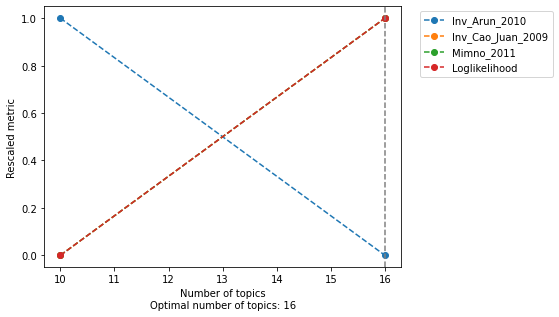

In [4]:
from pycisTopic.lda_models import *
model=evaluate_models(models,
                     select_model=16,
                     return_model=True,
                     metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                     plot_metrics=False,
                     save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/models/2.21.model_selection.pdf')

In [8]:
cistopic_obj.add_LDA_model(model)
type(cistopic_obj.projections["cell"])

dict

In [8]:
from pycisTopic.clust_vis import *
run_umap(cistopic_obj,target  = 'cell', scale=False)

2023-02-21 23:18:41,683 cisTopic     INFO     Running UMAP


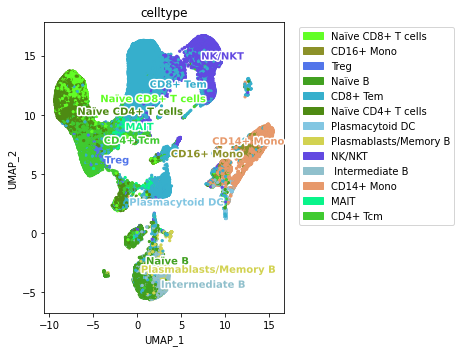

In [12]:
plot_metadata(cistopic_obj,
                 reduction_name='UMAP',
                 variables=['celltype'], # Labels from RNA and new clusters
                 target='cell', num_columns=2,
                 text_size=10,
                 dot_size=5,
                 figsize=(10,5),
              show_legend=True,
                 save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/dimensionality_reduction_label_uncorrected.celltype.pdf')

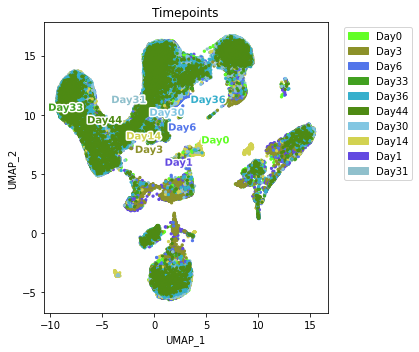

In [13]:
plot_metadata(cistopic_obj,
                 reduction_name='UMAP',
                 variables=['Timepoints'], # Labels from RNA and new clusters
                 target='cell', num_columns=2,
                 text_size=10,
                 dot_size=5,
                 figsize=(10,5),
              show_legend=True,
                 save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/dimensionality_reduction_label_uncorrected_timepoint.pdf')

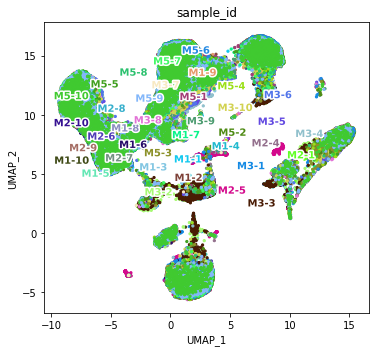

In [14]:
plot_metadata(cistopic_obj,
                 reduction_name='UMAP',
                 variables=['sample_id'], # Labels from RNA and new clusters
                 target='cell', num_columns=2,
                 text_size=10,
                 dot_size=5,
                 figsize=(10,5),
                 save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/dimensionality_reduction_label_uncorrected_sample_id.pdf')

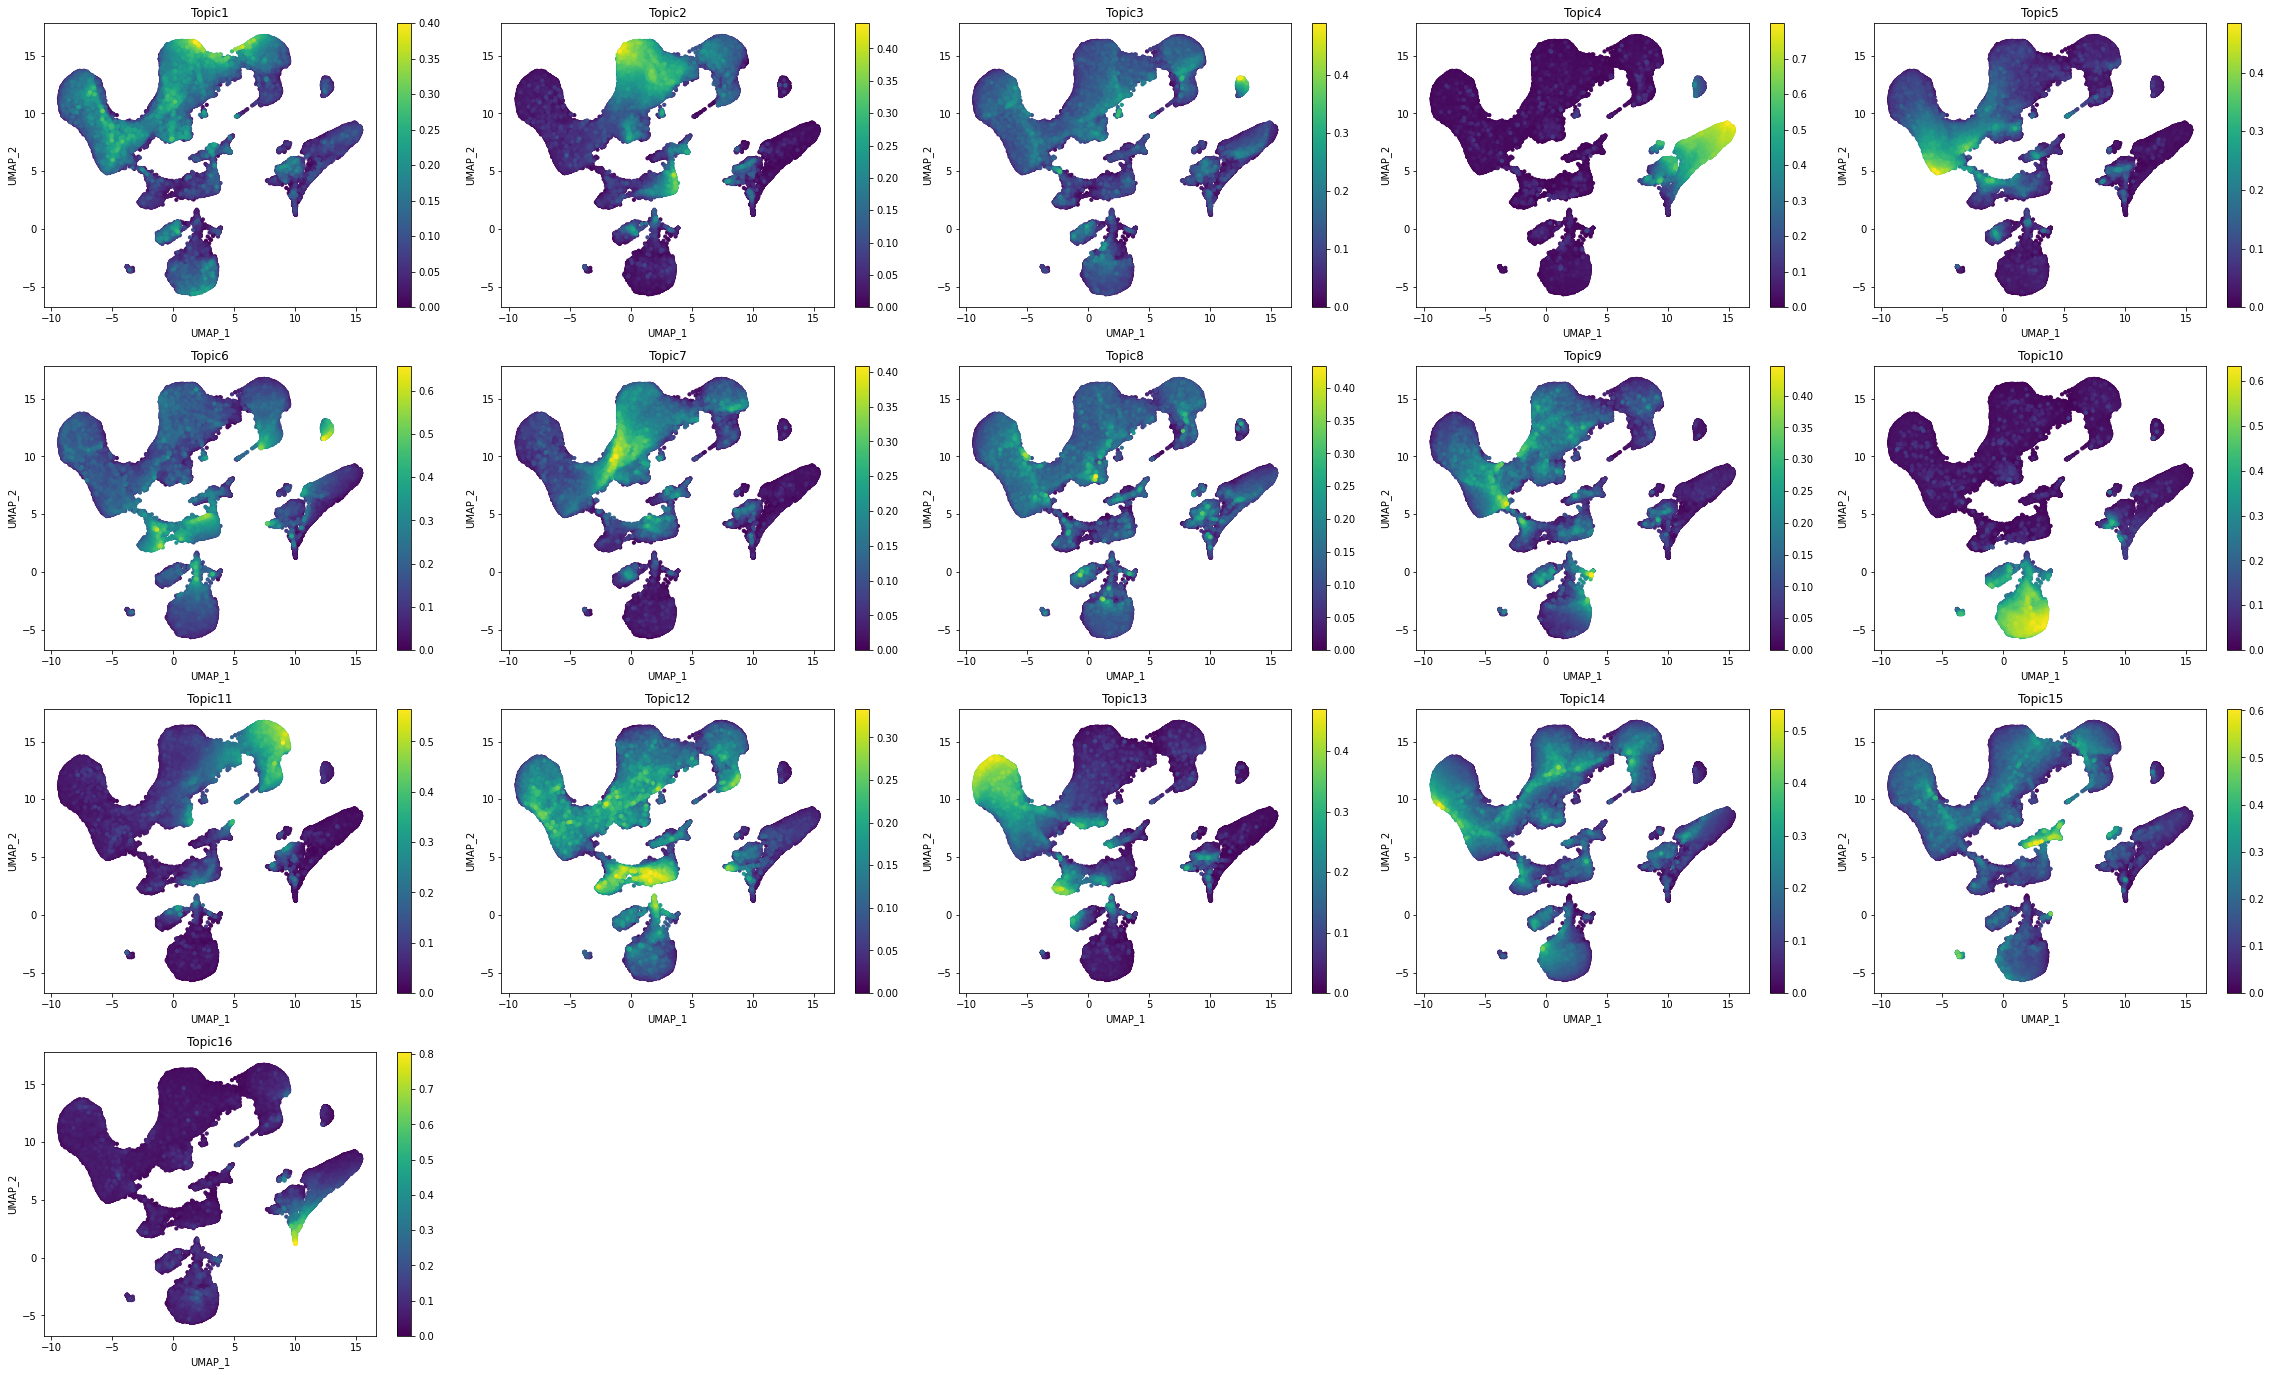

In [15]:
plot_topic(cistopic_obj,
            reduction_name = 'UMAP',
            target = 'cell',
            num_columns=5,
            save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/dimensionality_reduction_topic_uncorrected.pdf')

In [16]:
# Harmony
harmony(cistopic_obj, 'sample_id', random_state=555)
# UMAP
run_umap(cistopic_obj, reduction_name='harmony_UMAP',
                 target  = 'cell', harmony=True)

2023-02-22 14:08:23,539 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


2023-02-22 14:08:23,539 harmonypy    INFO     Computing initial centroids with sklearn.KMeans...


2023-02-22 14:09:13,463 - harmonypy - INFO - sklearn.KMeans initialization complete.


2023-02-22 14:09:13,463 harmonypy    INFO     sklearn.KMeans initialization complete.


2023-02-22 14:09:15,151 - harmonypy - INFO - Iteration 1 of 10


2023-02-22 14:09:15,151 harmonypy    INFO     Iteration 1 of 10


/usr/local/lib/python3.8/dist-packages/harmonypy/harmony.py:300: RuntimeWarning: invalid value encountered in true_divide
  self.R[:,b] = self.R[:,b] / np.linalg.norm(self.R[:,b], ord=1, axis=0)
2023-02-22 14:12:53,896 - harmonypy - INFO - Iteration 2 of 10


2023-02-22 14:12:53,896 harmonypy    INFO     Iteration 2 of 10


2023-02-22 14:15:30,009 - harmonypy - INFO - Iteration 3 of 10


2023-02-22 14:15:30,009 harmonypy    INFO     Iteration 3 of 10


2023-02-22 14:17:50,525 - harmonypy - INFO - Iteration 4 of 10


2023-02-22 14:17:50,525 harmonypy    INFO     Iteration 4 of 10


2023-02-22 14:20:19,433 - harmonypy - INFO - Iteration 5 of 10


2023-02-22 14:20:19,433 harmonypy    INFO     Iteration 5 of 10


2023-02-22 14:22:55,852 - harmonypy - INFO - Iteration 6 of 10


2023-02-22 14:22:55,852 harmonypy    INFO     Iteration 6 of 10


2023-02-22 14:26:07,026 - harmonypy - INFO - Iteration 7 of 10


2023-02-22 14:26:07,026 harmonypy    INFO     Iteration 7 of 10


2023-02-22 14:28:33,854 - harmonypy - INFO - Iteration 8 of 10


2023-02-22 14:28:33,854 harmonypy    INFO     Iteration 8 of 10


2023-02-22 14:31:47,441 - harmonypy - INFO - Iteration 9 of 10


2023-02-22 14:31:47,441 harmonypy    INFO     Iteration 9 of 10


2023-02-22 14:34:22,987 - harmonypy - INFO - Iteration 10 of 10


2023-02-22 14:34:22,987 harmonypy    INFO     Iteration 10 of 10


2023-02-22 14:37:41,093 - harmonypy - INFO - Stopped before convergence


2023-02-22 14:37:41,093 harmonypy    INFO     Stopped before convergence
2023-02-22 14:37:41,143 cisTopic     INFO     Running UMAP


ValueError: Input contains NaN.

In [20]:
type(cistopic_obj.cell_data["idbarcode.1"])

pandas.core.series.Series

In [19]:
print(cistopic_obj.cell_data["celltype"].value_counts())

CD8+ Tem                 78590
CD4+ Tcm                 37969
Naïve CD4+ T cells       29351
NK/NKT                   28714
Naïve B                  19303
Naïve CD8+ T cells        9654
CD14+ Mono                8844
 Intermediate B           6444
Treg                      4025
Plasmablasts/Memory B     3158
MAIT                      3105
CD16+ Mono                2662
Plasmacytoid DC            667
Name: celltype, dtype: int64


In [23]:
metadf=cistopic_obj.cell_data
metadf

,Unique_nr_frag_in_regions,Log_unique_nr_frag,Dupl_rate,cisTopic_log_nr_frag,Total_nr_frag,cisTopic_nr_acc,cisTopic_nr_frag,Unique_nr_frag,FRIP,TSS_enrichment,...,nCount_peaks,nFeature_peaks,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,peaks_snn_res.0.8,sample_id,barcode,id,idbarcode.1
AGTGTTTCATAGCAGG-1_M1-1___M1-1,4951,3.873204,0.173711,3.745465,9038,5079,5565,7468,0.662962,9.725911,...,5437.0,4643.0,3362.0,1077.0,0.0,23.0,M1-1,AGTGTTTCATAGCAGG-1,AGTGTTTCATAGCAGG-1_M1-1,AGTGTTTCATAGCAGG-1_M1-1___M1-1
CTTGCATGTACTTCAC-1_M1-1___M1-1,3771,3.792462,0.171432,3.656769,7484,4213,4537,6201,0.608128,10.015519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TGGCCAATCCTGCGAA-1_M1-1___M1-1,1456,3.391641,0.180306,3.236537,3006,1701,1724,2464,0.590909,7.618869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACCTGGATCTAGCTTT-1_M1-1___M1-1,7756,4.040919,0.156715,3.927165,13030,7367,8456,10988,0.705861,10.762919,...,8127.0,6470.0,4333.0,2241.0,14.0,10.0,M1-1,ACCTGGATCTAGCTTT-1,ACCTGGATCTAGCTTT-1_M1-1,ACCTGGATCTAGCTTT-1_M1-1___M1-1
TAAGCTGGTAAATTGC-1_M1-1___M1-1,3063,3.708166,0.178543,3.579097,6217,3591,3794,5107,0.599765,9.417302,...,3669.0,3319.0,4405.0,2274.0,34.0,6.0,M1-1,TAAGCTGGTAAATTGC-1,TAAGCTGGTAAATTGC-1_M1-1,TAAGCTGGTAAATTGC-1_M1-1___M1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACGGTTTAGTGAGAGC-1_M5-10___M5-10,2010,3.474362,0.274872,3.361161,4111,2217,2297,2981,0.674270,9.993196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGCCTGTGTTTGCAGA-1_M5-10___M5-10,1468,3.396896,0.293685,3.321805,3531,1960,2098,2494,0.588613,11.908124,...,2137.0,1930.0,3485.0,1176.0,14.0,0.0,M5-10,CGCCTGTGTTTGCAGA-1,CGCCTGTGTTTGCAGA-1_M5-10,CGCCTGTGTTTGCAGA-1_M5-10___M5-10
CGACAAGCAGGAAGCC-1_M5-10___M5-10,1339,3.377670,0.264261,3.23955,3243,1692,1736,2386,0.561190,9.213937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTAGGATCAGCACCAT-1_M5-10___M5-10,1414,3.406710,0.257135,3.28892,3434,1846,1945,2551,0.554292,12.434666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cleandf=metadf[metadf["id"].notna()]
cleandf

,Unique_nr_frag_in_regions,Log_unique_nr_frag,Dupl_rate,cisTopic_log_nr_frag,Total_nr_frag,cisTopic_nr_acc,cisTopic_nr_frag,Unique_nr_frag,FRIP,TSS_enrichment,...,nCount_peaks,nFeature_peaks,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,peaks_snn_res.0.8,sample_id,barcode,id,idbarcode.1
AGTGTTTCATAGCAGG-1_M1-1___M1-1,4951,3.873204,0.173711,3.745465,9038,5079,5565,7468,0.662962,9.725911,...,5437.0,4643.0,3362.0,1077.0,0.0,23.0,M1-1,AGTGTTTCATAGCAGG-1,AGTGTTTCATAGCAGG-1_M1-1,AGTGTTTCATAGCAGG-1_M1-1___M1-1
ACCTGGATCTAGCTTT-1_M1-1___M1-1,7756,4.040919,0.156715,3.927165,13030,7367,8456,10988,0.705861,10.762919,...,8127.0,6470.0,4333.0,2241.0,14.0,10.0,M1-1,ACCTGGATCTAGCTTT-1,ACCTGGATCTAGCTTT-1_M1-1,ACCTGGATCTAGCTTT-1_M1-1___M1-1
TAAGCTGGTAAATTGC-1_M1-1___M1-1,3063,3.708166,0.178543,3.579097,6217,3591,3794,5107,0.599765,9.417302,...,3669.0,3319.0,4405.0,2274.0,34.0,6.0,M1-1,TAAGCTGGTAAATTGC-1,TAAGCTGGTAAATTGC-1_M1-1,TAAGCTGGTAAATTGC-1_M1-1___M1-1
GGTGATTTCGATTTGA-1_M1-1___M1-1,4238,3.849726,0.176560,3.718751,8592,4875,5233,7075,0.599011,10.071061,...,5032.0,4406.0,3475.0,1149.0,9.0,2.0,M1-1,GGTGATTTCGATTTGA-1,GGTGATTTCGATTTGA-1_M1-1,GGTGATTTCGATTTGA-1_M1-1___M1-1
CCTAGTTGTCATGCAA-1_M1-1___M1-1,3898,3.768712,0.166288,3.654177,7042,4205,4510,5871,0.663941,10.301659,...,4400.0,3920.0,4448.0,2271.0,8.0,6.0,M1-1,CCTAGTTGTCATGCAA-1,CCTAGTTGTCATGCAA-1_M1-1,CCTAGTTGTCATGCAA-1_M1-1___M1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAAAGGCATGTGGGA-1_M5-10___M5-10,1698,3.519171,0.267346,3.400711,4511,2401,2516,3305,0.513767,10.213923,...,2402.0,2222.0,2929.0,983.0,1.0,5.0,M5-10,TTAAAGGCATGTGGGA-1,TTAAAGGCATGTGGGA-1_M5-10,TTAAAGGCATGTGGGA-1_M5-10___M5-10
TGATTAGTCTTAGGAC-1_M5-10___M5-10,1467,3.469233,0.250953,3.343212,3933,2123,2204,2946,0.497963,11.391131,...,2122.0,1990.0,3504.0,1437.0,2.0,0.0,M5-10,TGATTAGTCTTAGGAC-1,TGATTAGTCTTAGGAC-1_M5-10,TGATTAGTCTTAGGAC-1_M5-10___M5-10
GTCTAACAGTTGTCTT-1_M5-10___M5-10,1607,3.445915,0.260201,3.356026,3774,2195,2270,2792,0.575573,12.358410,...,2257.0,2128.0,3470.0,1137.0,4.0,1.0,M5-10,GTCTAACAGTTGTCTT-1,GTCTAACAGTTGTCTT-1_M5-10,GTCTAACAGTTGTCTT-1_M5-10___M5-10
TGCGCAGGTTTGCGCC-1_M5-10___M5-10,915,3.302764,0.259587,3.143639,2712,1344,1392,2008,0.455677,10.082813,...,1341.0,1271.0,3037.0,987.0,14.0,0.0,M5-10,TGCGCAGGTTTGCGCC-1,TGCGCAGGTTTGCGCC-1_M5-10,TGCGCAGGTTTGCGCC-1_M5-10___M5-10


In [25]:
type(cleandf['id'])

pandas.core.series.Series

In [33]:
cellname=cleandf['idbarcode.1'].values.tolist()
cellname
print(type(cistopic_obj.cell_names))
print(type(cellname))


<class 'list'>
<class 'list'>


In [30]:
clean_cistopic_obj=cistopic_obj.subset(cellname)

In [31]:
print(clean_cistopic_obj)


None


In [32]:
cellname

['AGTGTTTCATAGCAGG-1_M1-1___M1-1',
 'ACCTGGATCTAGCTTT-1_M1-1___M1-1',
 'TAAGCTGGTAAATTGC-1_M1-1___M1-1',
 'GGTGATTTCGATTTGA-1_M1-1___M1-1',
 'CCTAGTTGTCATGCAA-1_M1-1___M1-1',
 'TCGCGCACACTTACAG-1_M1-1___M1-1',
 'TAGCATATCCTAATAG-1_M1-1___M1-1',
 'AGTTACATCGGGATTT-1_M1-1___M1-1',
 'AGAATCTGTTCACTGT-1_M1-1___M1-1',
 'ACTCGCGCAAATACCT-1_M1-1___M1-1',
 'TTAAAGGCACCTGCTC-1_M1-1___M1-1',
 'TACCGTTGTTATTGCC-1_M1-1___M1-1',
 'CAAGTAACATGACTAT-1_M1-1___M1-1',
 'GTTACAGGTCTATCGT-1_M1-1___M1-1',
 'TCTAGCACATAGACTT-1_M1-1___M1-1',
 'GTTGGCCAGACTTACA-1_M1-1___M1-1',
 'CACTTAAAGTGAGCAA-1_M1-1___M1-1',
 'ACTTGAATCCCTCAGT-1_M1-1___M1-1',
 'GGCCTTAAGATAGACG-1_M1-1___M1-1',
 'TTTCTTGCAATGAAGC-1_M1-1___M1-1',
 'ATGACTCAGAGAAGGG-1_M1-1___M1-1',
 'GGTCCATCATGTCGCG-1_M1-1___M1-1',
 'AGGAACCAGTCTCACC-1_M1-1___M1-1',
 'GACCTCAAGCTAATCA-1_M1-1___M1-1',
 'TATTTGGAGGTTAGAG-1_M1-1___M1-1',
 'GGAGGTTAGGAGTCTT-1_M1-1___M1-1',
 'ACAGGTAAGCTTACTT-1_M1-1___M1-1',
 'GGATACTTCTAGCGAT-1_M1-1___M1-1',
 'GTTCTCATCTTGTCTG-1

In [37]:
intersection_cells=list(set(cellname).intersection(set(cistopic_obj.cell_names)))

In [38]:
len(intersection_cells)

232486

In [1]:
print(cistopic_obj)

NameError: name 'cistopic_obj' is not defined